In [0]:
# パッケージのインポート
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# データセットの準備
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [3]:
# データセットのシェイプの確認
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [4]:
# データセットのデータの確認
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [5]:
# データセットのラベルの確認
print(train_labels[0:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [0]:
# データセットのシャッフルの前処理
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

# データセットの正規化の前処理
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [7]:
# データセットの前処理後のデータの確認
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.397253,1.412057,-1.126646,-0.256833,-1.027385,0.726354,-1.000164,0.023834,-0.511142,-0.047533,-1.490674,0.415841,-0.836487
1,0.087846,-0.483615,1.028326,-0.256833,1.371293,-3.817250,0.676891,-1.049006,1.675886,1.565287,0.784476,-0.000885,-0.775760
2,-0.395379,1.201427,-0.690066,-0.256833,-0.942023,0.827918,-0.939245,0.259915,-0.626249,-0.914123,-0.398602,0.448077,-1.347144
3,-0.403759,3.097099,-1.022279,-0.256833,-1.095675,0.351129,-1.480347,2.364762,-0.626249,-0.330379,-0.262093,0.400521,-0.880652
4,-0.348692,-0.483615,-0.720935,-0.256833,-0.455458,3.467186,0.501302,-0.417158,-0.165822,-0.595170,-0.489608,0.289557,-1.119419


In [8]:
# モデルの作成
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# コンパイル
model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mae'])

Instructions for updating:
Use tf.cast instead.


In [0]:
# EarlyStoppingの準備
early_stop = EarlyStopping(monitor='val_loss', patience=30)

In [11]:
# 学習
history = model.fit(train_data, train_labels, epochs=500, 
    validation_split=0.2, callbacks=[early_stop])

Train on 323 samples, validate on 81 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
323/323 [==============================] - 0s 1ms/sample - loss: 541.7199 - mean_absolute_error: 21.2909 - val_loss: 564.2409 - val_mean_absolute_error: 21.8740
Epoch 2/500
323/323 [==============================] - 0s 71us/sample - loss: 496.2093 - mean_absolute_error: 20.1276 - val_loss: 509.4334 - val_mean_absolute_error: 20.5840
Epoch 3/500
323/323 [==============================] - 0s 69us/sample - loss: 443.3812 - mean_absolute_error: 18.7326 - val_loss: 440.3888 - val_mean_absolute_error: 18.8485
Epoch 4/500
323/323 [==============================] - 0s 71us/sample - loss: 374.9046 - mean_absolute_error: 16.9498 - val_loss: 354.5615 - val_mean_absolute_error: 16.5866
Epoch 5/500
323/323 [==============================] - 0s 72us/sample - loss: 293.0141 - mean_absolute_error: 14.7416 - val_loss: 258.3250 - val_mean_absolute_error: 13.7986
Epoch 6/500
323/323 [=================

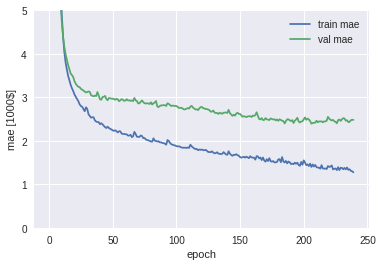

In [12]:
# グラフの表示
plt.plot(history.history['mean_absolute_error'], label='train mae')
plt.plot(history.history['val_mean_absolute_error'], label='val mae')
plt.xlabel('epoch')
plt.ylabel('mae [1000$]')
plt.legend(loc='best')
plt.ylim([0,5])
plt.show()

In [13]:
# 評価
test_loss, test_mae = model.evaluate(test_data, test_labels)
print('loss:{:.3f}\nmae: {:.3f}'.format(test_loss, test_mae))

102/102 [==============================] - 0s 80us/sample - loss: 15.8515 - mean_absolute_error: 2.5893
loss:15.851
mae: 2.589


In [14]:
# 推論する値段の表示
print(np.round(test_labels[0:10]))

# 推論した値段の表示
test_predictions = model.predict(test_data[0:10]).flatten()
print(np.round(test_predictions))

[ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
[10. 19. 21. 33. 26. 21. 26. 22. 19. 22.]
